In [10]:
%load_ext autoreload
%autoreload 2

import json
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt

import xobjects as xo
import xtrack   as xt
import xpart    as xp
import xcoll    as xc

pd.set_option('display.max_columns', None)



# Make a context and get a buffer
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs
buffer = context.new_buffer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load from json
with open('machines/lhc_run3_b1.json', 'r') as fid:
    loaded_dct = json.load(fid)
line = xt.Line.from_dict(loaded_dct)

# Aperture model check
print('\nAperture model check on imported model:')
df_imported = line.check_aperture()
assert not np.any(df_imported.has_aperture_problem)

Done loading line from dict.           

Aperture model check on imported model:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]


In [3]:
# Initialise collmanager,on the specified buffer
coll_manager = xc.CollimatorManager(
    line=line,
    colldb=xc.load_SixTrack_colldb('colldb/lhc_run3_b1.dat', emit=3.5e-6)
    )

# Install collimators in line as black absorbers
coll_manager.install_k2_collimators(verbose=True)

# Build the tracker
coll_manager.build_tracker()

# Align the collimators
coll_manager.align_collimators_to('front')

coll_manager.set_openings()

# Aperture model check
print('\nAperture model check after introducing collimators:')
df_with_coll = line.check_aperture()
assert not np.any(df_with_coll.has_aperture_problem)

Installing tcl.4r1.b1
Installing tcl.5r1.b1
Installing tcl.6r1.b1
Installing tctph.4l2.b1
Installing tctpv.4l2.b1
Installing tdisa.a4l2.b1
Installing tdisb.a4l2.b1
Installing tdisc.a4l2.b1
Installing tclia.4r2
Installing tclib.6r2.b1
Installing tcld.a11r2.b1
Installing tcp.6l3.b1
Installing tcsg.5l3.b1
Installing tcsg.4r3.b1
Installing tcsg.a5r3.b1
Installing tcsg.b5r3.b1
Installing tcla.a5r3.b1
Installing tcla.b5r3.b1
Installing tcla.6r3.b1
Installing tcla.7r3.b1
Installing tctph.4l5.b1
Installing tctpv.4l5.b1
Installing tcl.4r5.b1
Installing tcl.5r5.b1
Installing tcl.6r5.b1
Installing tcdqa.a4r6.b1
Installing tcdqa.c4r6.b1
Installing tcdqa.b4r6.b1
Installing tcsp.a4r6.b1
Installing tcp.d6l7.b1
Installing tcp.c6l7.b1
Installing tcp.b6l7.b1
Installing tcsg.a6l7.b1
Installing tcsg.b5l7.b1
Installing tcsg.a5l7.b1
Installing tcsg.d4l7.b1
Installing tcspm.b4l7.b1
Installing tcsg.a4l7.b1
Installing tcsg.a4r7.b1
Installing tcsg.b5r7.b1
Installing tcsg.d5r7.b1
Installing tcspm.e5r7.b1
Install

In [22]:
# Horizontal loss map
num_particles = 50000
coll = 'tcp.c6l7.b1'

# Collimator plane: generate pencil distribution in normalized coordinates
x_norm, px_norm, _, _ = xp.generate_2D_pencil(
                             num_particles=num_particles,
                             pos_cut_sigmas=coll_manager.colldb.gap[coll],
                             dr_sigmas=0.002,
                             side='+-')

# Other plane: generate gaussian distribution in normalized coordinates
y_norm = np.random.normal(scale=0.01, size=num_particles)
py_norm = np.random.normal(scale=0.01, size=num_particles)

part = xp.build_particles(
            tracker=coll_manager.line.tracker,
            x_norm=x_norm, px_norm=px_norm,
            y_norm=y_norm, py_norm=py_norm,
            scale_with_transverse_norm_emitt=coll_manager.colldb.emittance,
            at_element=coll,
            match_at_s=coll_manager.s_match[coll])

Ignoring collective elements in particles generation.


generating ./d0c94dc3f1934311b9dd0638ca4e9df1.c
the current directory is '/Users/frederik/Develop/pythondev/xcoll/examples'
running build_ext
building 'd0c94dc3f1934311b9dd0638ca4e9df1' extension
clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/frederik/opt/miniconda3/include -fPIC -O2 -isystem /Users/frederik/opt/miniconda3/include -I/usr/local/opt/openjdk/include -I/Users/frederik/opt/miniconda3/include/python3.10 -c d0c94dc3f1934311b9dd0638ca4e9df1.c -o ./d0c94dc3f1934311b9dd0638ca4e9df1.o -std=c99 -O3 -Wno-unused-function
clang -bundle -undefined dynamic_lookup -Wl,-rpath,/Users/frederik/opt/miniconda3/lib -L/Users/frederik/opt/miniconda3/lib -Wl,-rpath,/Users/frederik/opt/miniconda3/lib -L/Users/frederik/opt/miniconda3/lib -I/usr/local/opt/openjdk/include ./d0c94dc3f1934311b9dd0638ca4e9df1.o -o ./d0c94dc3f1934311b9dd0638ca4e9df1.cpython-310-darwin.so -std=c99 -O3


In [23]:
# Track
coll_manager.track(part, num_turns=1)

In [25]:
# Get losses for lossmap
coll_manager.create_lossmap(part)

coll_manager.lossmap

generating ./4da35e49fb574717a68dc8f85de07b01.c
the current directory is '/Users/frederik/Develop/pythondev/xcoll/examples'
running build_ext
building '4da35e49fb574717a68dc8f85de07b01' extension
clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/frederik/opt/miniconda3/include -fPIC -O2 -isystem /Users/frederik/opt/miniconda3/include -I/usr/local/opt/openjdk/include -I/Users/frederik/opt/miniconda3/include/python3.10 -c 4da35e49fb574717a68dc8f85de07b01.c -o ./4da35e49fb574717a68dc8f85de07b01.o -std=c99 -O3 -Wno-unused-function
clang -bundle -undefined dynamic_lookup -Wl,-rpath,/Users/frederik/opt/miniconda3/lib -L/Users/frederik/opt/miniconda3/lib -Wl,-rpath,/Users/frederik/opt/miniconda3/lib -L/Users/frederik/opt/miniconda3/lib -I/usr/local/opt/openjdk/include ./4da35e49fb574717a68dc8f85de07b01.o -o ./4da35e49fb574717a68dc8f85de07b01.cpython-310-darwin.so -std=c99 -O3
generating ./e9406c1daf5d47b7a739fa463d982763.c
the curr

{'collimator': {'s': [20213.732375788,
   20213.732375788,
   20213.732375788,
   20147.589378288998,
   20147.589378288998,
   20147.589378288998,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523378289,
   20142.523

In [6]:
class CollimatorSettings:
    def __init__(self, elem):
        self._element = elem

    @property
    def jaw_F_L(self):
        return self._element.jaw_F_L
    
    @jaw_F_L.setter
    def jaw_F_L(self, val):
        self._element.jaw_F_L = val

In [13]:
test = CollimatorSettings(coll_manager.line['tcp.c6l7.b1'])

In [15]:
test.jaw_F_L = 0.1

In [18]:
coll_manager.tracker

In [26]:
# Vertical loss map

num_particles = 50000
coll = 'tcp.c6l7.b1'

# Collimator plane: generate pencil distribution in normalized coordinates
x_norm, py_norm, _, _ = xp.generate_2D_pencil(
                             num_particles=num_particles,
                             pos_cut_sigmas=coll_manager.colldb.gap[coll],
                             dr_sigmas=0.002,
                             side='+-')

# Other plane: generate gaussian distribution in normalized coordinates
y_norm = np.random.normal(scale=0.01, size=num_particles)
py_norm = np.random.normal(scale=0.01, size=num_particles)

part = xp.build_particles(
            tracker=coll_manager.tracker,
            x_norm=x_norm, px_norm=px_norm,
            y_norm=y_norm, py_norm=py_norm,
            scale_with_transverse_norm_emitt=coll_manager.colldb.emittance,
            at_element=coll,
            match_at_s=coll_manager.s_match[coll])

Ignoring collective elements in particles generation.


In [21]:
# Track
tracker.track(part, num_turns=10)

In [9]:
collimator_losses = part.s[part.state==-333]
aperture_losses = part.s[part.state==-1]
other_losses = part.s[(part.state<=0) & (part.state!=-333)  & (part.state!=-1)]
if len(other_losses) > 0:
    raise Exception("Unexpected losses type. Please investigate.")

In [23]:
np.unique(part.state)

array([-333,    1])

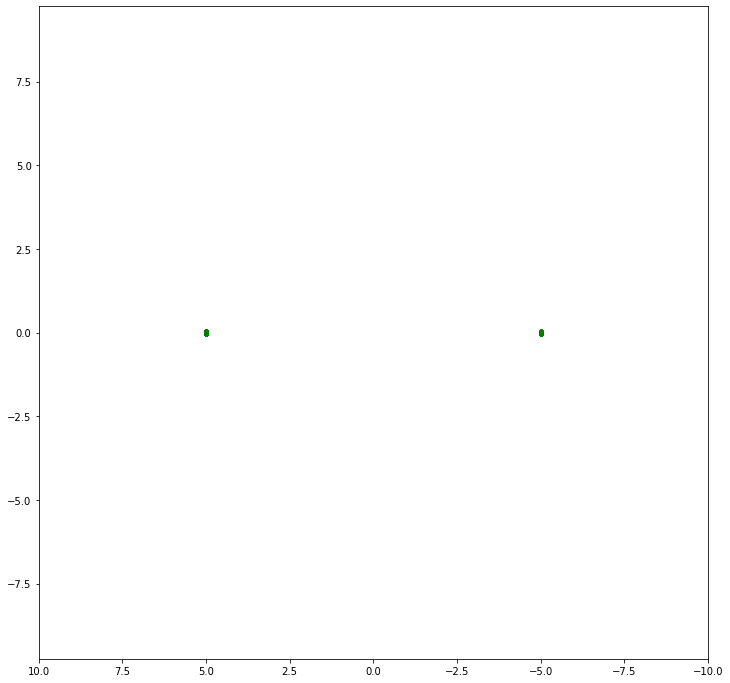

In [24]:
# The survival flags are sorted as surviving particles first,
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm, y_norm, '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green')
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
plt.show()

In [25]:
part.x

array([-5.37249889e-05, -5.39527855e-05, -5.09267623e-05, ...,
       -1.31005348e-03, -1.31023608e-03, -1.31037353e-03])